# Import Library

In [1]:
%matplotlib inline
import numpy as np # n-dimensional array object & math functions
import pandas as pd # load data into dataframe
import sklearn #scikit-learn algorithms for machine learning
import scipy # scientific computing: linear algebra, optimization, signal processing, statistics
import matplotlib.pyplot as plt # basic plots
import seaborn as sns # advanced statistical plots

# Numpy Array

In [2]:
arr_1=np.array([[1,2,3],[4,5,6]])
print(arr_1)
print("\n")
print(np.transpose(arr_1))

[[1 2 3]
 [4 5 6]]


[[1 4]
 [2 5]
 [3 6]]


In [3]:
print(np.median(arr_1))
print("\n")
print(np.median(arr_1,axis=1))
print("\n")
print(np.average(arr_1))
print("\n")
print(np.std(arr_1))
print("\n")
print(np.var(arr_1))
print("\n")
print(np.std(arr_1)**2)

3.5


[2. 5.]


3.5


1.707825127659933


2.9166666666666665


2.9166666666666665


In [4]:
arr_2=np.array([[7,8,9],[10,11,12]])
print(arr_2)
print("\n")
print(np.vstack((arr_1,arr_2)))
print("\n")
print(np.hstack((arr_1,arr_2)))
print("\n")
print(np.hstack((arr_1,arr_2)).reshape(3,4))
print("\n")
print(np.add(arr_1,arr_2))
print("\n")
print(np.vdot(arr_1,arr_2))
print("\n")
print(np.inner(arr_1,arr_2))
print("\n")
print(np.matmul(arr_1,arr_2.T))

[[ 7  8  9]
 [10 11 12]]


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


[[ 1  2  3  7]
 [ 8  9  4  5]
 [ 6 10 11 12]]


[[ 8 10 12]
 [14 16 18]]


217


[[ 50  68]
 [122 167]]


[[ 50  68]
 [122 167]]


# Concatenate Data

In [5]:
df_1=pd.DataFrame({'A':[1,2,3],
                'B':[4,5,6]})
print(df_1)

   A  B
0  1  4
1  2  5
2  3  6


In [6]:
df_2=pd.DataFrame({'A':[7,8,9],
                'B':[1,0,1]})
df_2

,A,B
0,7,1
1,8,0
2,9,1


In [7]:
pd.concat([df_1,df_2],axis=0)

,A,B
0,1,4
1,2,5
2,3,6
0,7,1
1,8,0
2,9,1


In [8]:
pd.concat([df_1,df_2],axis=0).reset_index()

,index,A,B
0,0,1,4
1,1,2,5
2,2,3,6
3,0,7,1
4,1,8,0
5,2,9,1


In [9]:
pd.concat([df_1,df_2],axis=0).reset_index().drop(columns=["index"])

,A,B
0,1,4
1,2,5
2,3,6
3,7,1
4,8,0
5,9,1


In [10]:
pd.concat([df_1,df_2],axis=0).reset_index().groupby('index').std()

,A,B
index,,
0,4.242641,2.121320
1,4.242641,3.535534
2,4.242641,3.535534


In [11]:
(df_1+df_2)/2

,A,B
0,4.0,2.5
1,5.0,2.5
2,6.0,3.5


In [12]:
df_3=pd.DataFrame({'A':[1,2,3,4],
                'D':[1,0,1,0]})
df_3

,A,D
0,1,1
1,2,0
2,3,1
3,4,0


In [13]:
#how: 'left', 'right','outer','inner','cross'
pd.merge(left=df_1,right=df_3,on='A',how='left')

,A,B,D
0,1,4,1
1,2,5,0
2,3,6,1


# Missing Values

In [14]:
# Create a df from np.array with 3 features 'f1' 'f2' 'f3'
data=np.array([5,7,8, np.NaN, np.NaN, np.NaN, -5,0,25,999,1,-1, np.NaN, 0, np.NaN])
df = pd.DataFrame(data.reshape((5,3)))
df.columns = ['f1', 'f2', 'f3']
df

,f1,f2,f3
0,5.0,7.0,8.0
1,NaN,NaN,NaN
2,-5.0,0.0,25.0
3,999.0,1.0,-1.0
4,NaN,0.0,NaN


In [15]:
df.count()

f1    3
f2    4
f3    3
dtype: int64

In [16]:
df.isna()

,f1,f2,f3
0,False,False,False
1,True,True,True
2,False,False,False
3,False,False,False
4,True,False,True


In [17]:
#count missing values
df.isna().sum()

f1    2
f2    1
f3    2
dtype: int64

In [18]:
df.isna().sum()/len(df)

f1    0.4
f2    0.2
f3    0.4
dtype: float64

In [19]:
#dropna: if you have a lot of data for analysis
#how{‘any’, ‘all’}, default ‘any’
print(df.dropna(how='any'))
print("\n")
print(df)

      f1   f2    f3
0    5.0  7.0   8.0
2   -5.0  0.0  25.0
3  999.0  1.0  -1.0


      f1   f2    f3
0    5.0  7.0   8.0
1    NaN  NaN   NaN
2   -5.0  0.0  25.0
3  999.0  1.0  -1.0
4    NaN  0.0   NaN


In [20]:
#axis: 0 for rows, 1 for columns
#tresh: the number of non-NaN’s not to drop a row or column
#inplace: update the frame
df.dropna(axis=0, thresh=1, inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
df

,f1,f2,f3
0,5.0,7.0,8.0
1,-5.0,0.0,25.0
2,999.0,1.0,-1.0
3,NaN,0.0,NaN


In [21]:
#missing values may have various expressions
df.replace({999.0 : np.NaN}, inplace=True)
df

,f1,f2,f3
0,5.0,7.0,8.0
1,-5.0,0.0,25.0
2,NaN,1.0,-1.0
3,NaN,0.0,NaN


In [22]:
df.replace({np.NaN:0})

,f1,f2,f3
0,5.0,7.0,8.0
1,-5.0,0.0,25.0
2,0.0,1.0,-1.0
3,0.0,0.0,0.0


In [23]:
df

,f1,f2,f3
0,5.0,7.0,8.0
1,-5.0,0.0,25.0
2,NaN,1.0,-1.0
3,NaN,0.0,NaN


In [24]:
#missing_values: np.NaN,-1,9999....
#f2 did not have missing values anymore,so it is not detected
#Most learning algorithms perform poorly when missing values are expressed as not a number (np.NaN)
#Be aware that some libraries and algorithms, such as XGBoost, can handle missing values and impute these values automatically by learning.

from sklearn.impute import MissingIndicator
indicator = MissingIndicator(missing_values=np.NaN)
indicator = indicator.fit_transform(df)
indicator = pd.DataFrame(indicator, columns=['m1', 'm3'])
indicator

,m1,m3
0,False,False
1,False,False
2,True,False
3,True,True


In [25]:
from sklearn.impute import SimpleImputer
#strategystr, default=’mean’,others: 'median' 'most_frequent' 'constant'(with fill_value=?)
imp1 = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
imp1.fit_transform(df)

array([[ 5.,  7.,  8.],
       [-5.,  0., 25.],
       [ 0.,  1., -1.],
       [ 0.,  0.,  0.]])

In [26]:
df

,f1,f2,f3
0,5.0,7.0,8.0
1,-5.0,0.0,25.0
2,NaN,1.0,-1.0
3,NaN,0.0,NaN


In [27]:
#fill by mean
imp2=df.fillna(df.mean()).round(1)
imp2

,f1,f2,f3
0,5.0,7.0,8.0
1,-5.0,0.0,25.0
2,0.0,1.0,-1.0
3,0.0,0.0,10.7


In [28]:
#Create datetimeindex
date=pd.date_range(start='1/1/2022',periods=4,freq='M').sort_values(ascending=False)
date

DatetimeIndex(['2022-04-30', '2022-03-31', '2022-02-28', '2022-01-31'], dtype='datetime64[ns]', freq='-1M')

In [29]:
df['date']=date
df

,f1,f2,f3,date
0,5.0,7.0,8.0,2022-04-30
1,-5.0,0.0,25.0,2022-03-31
2,NaN,1.0,-1.0,2022-02-28
3,NaN,0.0,NaN,2022-01-31


In [30]:
# 'ffill':fill forward
# 'bfill':fill backward
imp3=df.sort_values(by=['date']).fillna(method='bfill')
imp3

,f1,f2,f3,date
3,-5.0,0.0,-1.0,2022-01-31
2,-5.0,1.0,-1.0,2022-02-28
1,-5.0,0.0,25.0,2022-03-31
0,5.0,7.0,8.0,2022-04-30


In [31]:
# ‘linear’: Ignore the index and treat the values as equally spaced. This is the only method supported on MultiIndexes.
# ‘time’: Works on daily and higher resolution data to interpolate given length of interval.
# ‘index’, ‘values’: use the actual numerical values of the index.
# ‘pad’: Fill in NaNs using existing values.
# ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’: Passed to scipy.interpolate.interp1d. These methods use the numerical values of the index. Both ‘polynomial’ and ‘spline’ require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).
# ‘krogh’, ‘piecewise_polynomial’, ‘spline’, ‘pchip’, ‘akima’, ‘cubicspline’: Wrappers around the SciPy interpolation methods of similar names. See Notes.
# ‘from_derivatives’: Refers to scipy.interpolate.BPoly.from_derivatives which replaces ‘piecewise_polynomial’ interpolation method in scipy 0.18.
imp4=df.drop('date',axis=1).interpolate(method='linear')
imp4

,f1,f2,f3
0,5.0,7.0,8.0
1,-5.0,0.0,25.0
2,-5.0,1.0,-1.0
3,-5.0,0.0,-1.0


In [32]:
df.fillna(df.mean(numeric_only=True),inplace=True)
df

,f1,f2,f3,date
0,5.0,7.0,8.000000,2022-04-30
1,-5.0,0.0,25.000000,2022-03-31
2,0.0,1.0,-1.000000,2022-02-28
3,0.0,0.0,10.666667,2022-01-31


# Ploynomial Features

In [33]:
#degree=2: X=x1, x2 => X= 1, x1, x2, x1², x1x2 and x2²
#interaction_only=True: X=x1, x2 => X= 1, x1, x2 and x1x2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, interaction_only=True)
polynomials = pd.DataFrame(poly\
                           .fit_transform(df[['f1','f2','f3']]),
                           columns=['0','1','2','3',
                                    'p1', 'p2', 'p3', 'p4'])\
                                        [['p1', 'p2', 'p3', 'p4']]


In [34]:
# f1f2,f1f3,f2f3,f1f2f3
polynomials

,p1,p2,p3,p4
0,35.0,40.0,56.0,280.0
1,-0.0,-125.0,0.0,-0.0
2,0.0,-0.0,-1.0,-0.0
3,0.0,0.0,0.0,0.0


In [35]:
df = pd.concat([df, indicator, polynomials], axis=1)
df

,f1,f2,f3,date,m1,m3,p1,p2,p3,p4
0,5.0,7.0,8.000000,2022-04-30,False,False,35.0,40.0,56.0,280.0
1,-5.0,0.0,25.000000,2022-03-31,False,False,-0.0,-125.0,0.0,-0.0
2,0.0,1.0,-1.000000,2022-02-28,True,False,0.0,-0.0,-1.0,-0.0
3,0.0,0.0,10.666667,2022-01-31,True,True,0.0,0.0,0.0,0.0


# Categorical Features

In [36]:
dfc = pd.DataFrame(
    np.array(['M', 'O-', 'medium',
             'M', 'O-', 'high',
              'F', 'O+', 'high',
              'F', 'AB', 'low',
              'F', 'B+', np.NaN])
              .reshape((5,3)))
dfc.columns = ['sex', 'blood_type', 'edu_level']
dfc

,sex,blood_type,edu_level
0,M,O-,medium
1,M,O-,high
2,F,O+,high
3,F,AB,low
4,F,B+,nan


In [37]:
#a series or a row
dfc.edu_level.values

array(['medium', 'high', 'high', 'low', 'nan'], dtype=object)

In [38]:
#reshape to be 1 column
dfc.edu_level.values.reshape(-1,1)

array([['medium'],
       ['high'],
       ['high'],
       ['low'],
       ['nan']], dtype=object)

In [39]:
cat = pd.Categorical(dfc.edu_level,
                     categories=['missing', 'low',
                                 'medium', 'high'],
                     ordered=True)

In [40]:
cat.fillna('missing')

['medium', 'high', 'high', 'low', 'missing']
Categories (4, object): ['missing' < 'low' < 'medium' < 'high']

In [41]:
#Encode the object as an enumerated type or categorical variable.
labels, unique = pd.factorize(cat, sort=True)
dfc.edu_level = labels
dfc

,sex,blood_type,edu_level
0,M,O-,1
1,M,O-,2
2,F,O+,2
3,F,AB,0
4,F,B+,-1


In [42]:
conditions=[dfc['edu_level']==-1,dfc['edu_level']==0,dfc['edu_level']==1,dfc['edu_level']==2]
values=['missing',"low",'middle','high']
dfc["edu_level"]=np.select(conditions, values)
dfc

,sex,blood_type,edu_level
0,M,O-,middle
1,M,O-,high
2,F,O+,high
3,F,AB,low
4,F,B+,missing


In [43]:
dfc["edu_level_new"]=dfc["edu_level"].map({'missing':-1,"low":0,'meddle':1,'high':2})
dfc

,sex,blood_type,edu_level,edu_level_new
0,M,O-,middle,NaN
1,M,O-,high,2.0
2,F,O+,high,2.0
3,F,AB,low,0.0
4,F,B+,missing,-1.0


In [44]:
df2=pd.DataFrame()
df2['F']=dfc['sex'].apply(lambda x: 1 if x=='F' else 0)
df2['M']=dfc['sex'].apply(lambda x: 1 if x=='M' else 0)
df2['O-']=dfc['blood_type'].apply(lambda x: 1 if x=='O-' else 0)
df2['AB']=dfc['blood_type'].apply(lambda x: 1 if x=='AB' else 0)
df2['A']=dfc['blood_type'].apply(lambda x: 1 if x=='A' else 0)
df2['B']=dfc['blood_type'].apply(lambda x: 1 if x=='B' else 0)
df2

,F,M,O-,AB,A,B
0,0,1,1,0,0,0
1,0,1,1,0,0,0
2,1,0,0,0,0,0
3,1,0,0,1,0,0
4,1,0,0,0,0,0


In [45]:
# each categorical feature with n categories is transformed into n binary features
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=np.int32)
nominals = pd.DataFrame(onehot.fit_transform(dfc[['sex', 'blood_type']]).toarray())
nominals.columns=['F', 'M', 'AB', 'B+','O+', 'O-']
nominals['edu_level'] = dfc.edu_level
nominals

,F,M,AB,B+,O+,O-,edu_level
0,0,1,0,0,0,1,middle
1,0,1,0,0,0,1,high
2,1,0,0,0,1,0,high
3,1,0,1,0,0,0,low
4,1,0,0,1,0,0,missing


# Numerical Features

<Axes: ylabel='Count'>

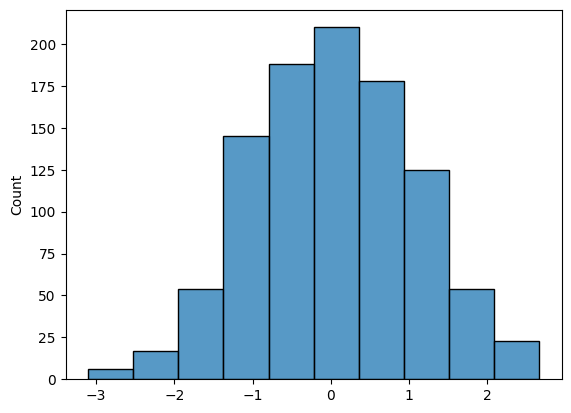

In [46]:
x=np.random.normal(size=1000)
sns.histplot(x,bins=10)

<Axes: ylabel='count'>

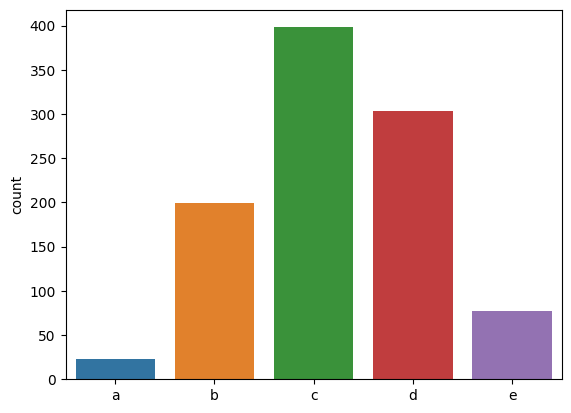

In [47]:
#Discretization: divides a continuous feature into a pre-specified number of categories (bins)
x=pd.Series(x)
y=pd.cut(x,5,labels=['a','b','c','d','e'])
sns.countplot(x=y)

<Axes: ylabel='count'>

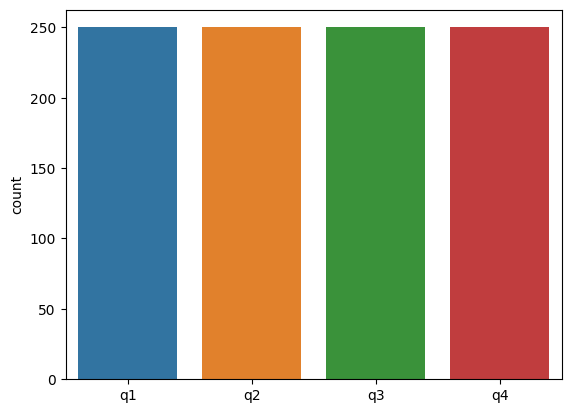

In [51]:
#Quantile-based discretization function.
y1=pd.qcut(x,4,labels=['q1','q2','q3','q4'])
sns.countplot(x=y1)

<Axes: ylabel='count'>

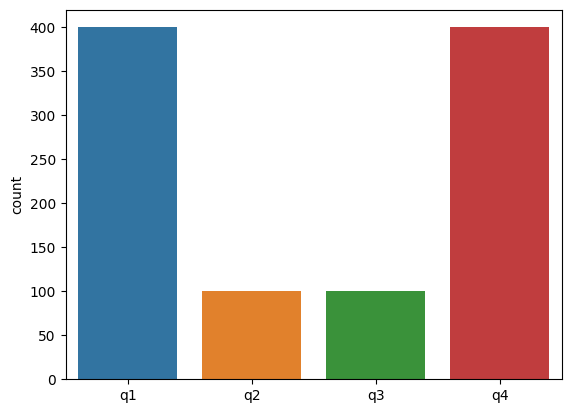

In [53]:
y2=pd.qcut(x,q=[0,0.4,0.5,0.6,1],labels=['q1','q2','q3','q4'])
sns.countplot(x=y2)

# Custom Transformations

In [54]:
df

,f1,f2,f3,date,m1,m3,p1,p2,p3,p4
0,5.0,7.0,8.000000,2022-04-30,False,False,35.0,40.0,56.0,280.0
1,-5.0,0.0,25.000000,2022-03-31,False,False,-0.0,-125.0,0.0,-0.0
2,0.0,1.0,-1.000000,2022-02-28,True,False,0.0,-0.0,-1.0,-0.0
3,0.0,0.0,10.666667,2022-01-31,True,True,0.0,0.0,0.0,0.0


In [55]:
df1=df.f2.apply(lambda x:np.log(x))
df1

0    1.94591
1       -inf
2    0.00000
3       -inf
Name: f2, dtype: float64

# Feature Scaling

In [56]:
#Standardlization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df.f3.values.reshape(-1, 1))

array([[-0.28562322],
       [ 1.53522482],
       [-1.24960159],
       [ 0.        ]])

In [57]:
#MinMax Scaler: (x-min(x))/(max(x)-min(x)) [0,1] as default
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3,3))
scaler.fit_transform(df.f3.values.reshape(-1, 1))

array([[-0.92307692],
       [ 3.        ],
       [-3.        ],
       [-0.30769231]])

In [58]:
#MaxAbs Scaler: x/max(abs(x)) [-1,1]
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit_transform(df.f3.values.reshape(-1, 1))

array([[ 0.32      ],
       [ 1.        ],
       [-0.04      ],
       [ 0.42666667]])

In [59]:
#Robust Sacler: remove outliers
from sklearn.preprocessing import RobustScaler
robust = RobustScaler(quantile_range = (0.1,0.9))
robust.fit_transform(df.f3.values.reshape(-1, 1))

array([[ -6.17283951],
       [ 72.5308642 ],
       [-47.83950617],
       [  6.17283951]])